In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
raw = pd.read_excel('ProductionReport_EPIX PRO (Gen 2) 47mm_ASSY_ConceptPhase_2022-10-17.xlsx',sheet_name='Raw Data (2)',parse_dates=[6])
raw.head()

,ProcessType,GPN,JobNO,ItemNameType,StationID,SerialNumber,tDateTime,Result,failitem,GPS_ (L1 + L5) by ref,ANT_power 2450MHz BY REF,GPS_L5 by ref,Temperature Sensor Temperature,ECG impedance short
0,Watch_ClickTest,011-06016-00,16037710,12434.0,0,3431590171,2022-10-03 06:37:17+00:00,True,0.0,5.900000,0.28,75275.0,74255.000000,NaN
1,Epix_Pro_Gyro,011-06016-00,16037710,17807.0,2,3431589994,2022-10-03 00:29:03+00:00,True,0.0,24.367188,0.00,0.0,4.355000,NaN
2,Epix_Pro_Gyro,011-06016-00,16037710,17807.0,1,3431590233,2022-10-03 00:22:38+00:00,True,0.0,24.074219,0.00,0.0,4.356000,NaN
3,Epix_Pro_Gyro,011-06016-00,16037710,17807.0,2,3431589992,2022-10-03 00:20:39+00:00,True,0.0,24.261719,0.00,0.0,4.375000,NaN
4,Epix_Pro_Compass,011-06016-00,16037710,17810.0,1,3431590255,2022-10-01 02:55:38+00:00,True,0.0,0.204195,NaN,NaN,0.000184,NaN


In [12]:
plt.style.use('fivethirtyeight')

1. ECG_FT - ECG impedance short (113/440)

<AxesSubplot:xlabel='ECG impedance short', ylabel='Count'>

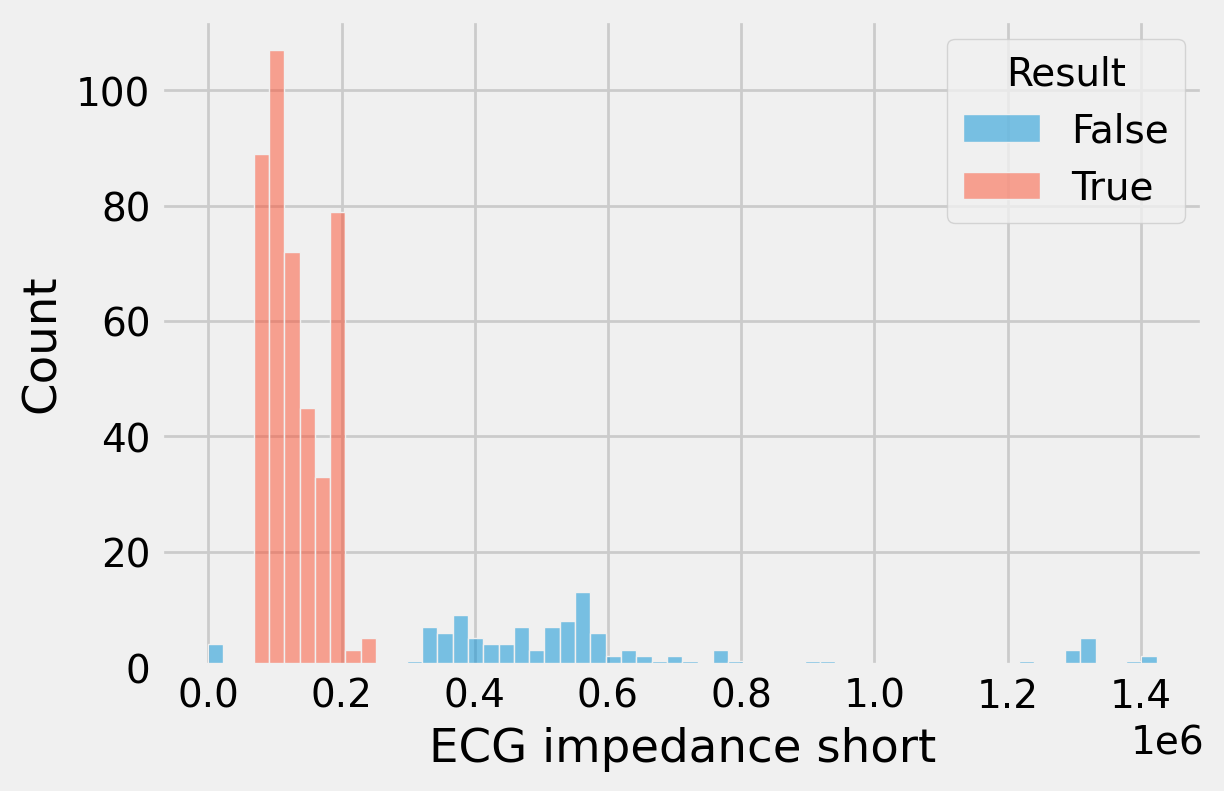

In [13]:
ecg = raw[(raw.ItemNameType == 17820) & (raw.failitem.isin([0,285]))]
plt.figure(dpi=200)
sns.histplot(data=ecg, x='ECG impedance short', hue='Result')

4. FT2-ANT_power 2450MHz BY REF (sapphire) (29/440)

<AxesSubplot:xlabel='ANT_power 2450MHz BY REF', ylabel='Count'>

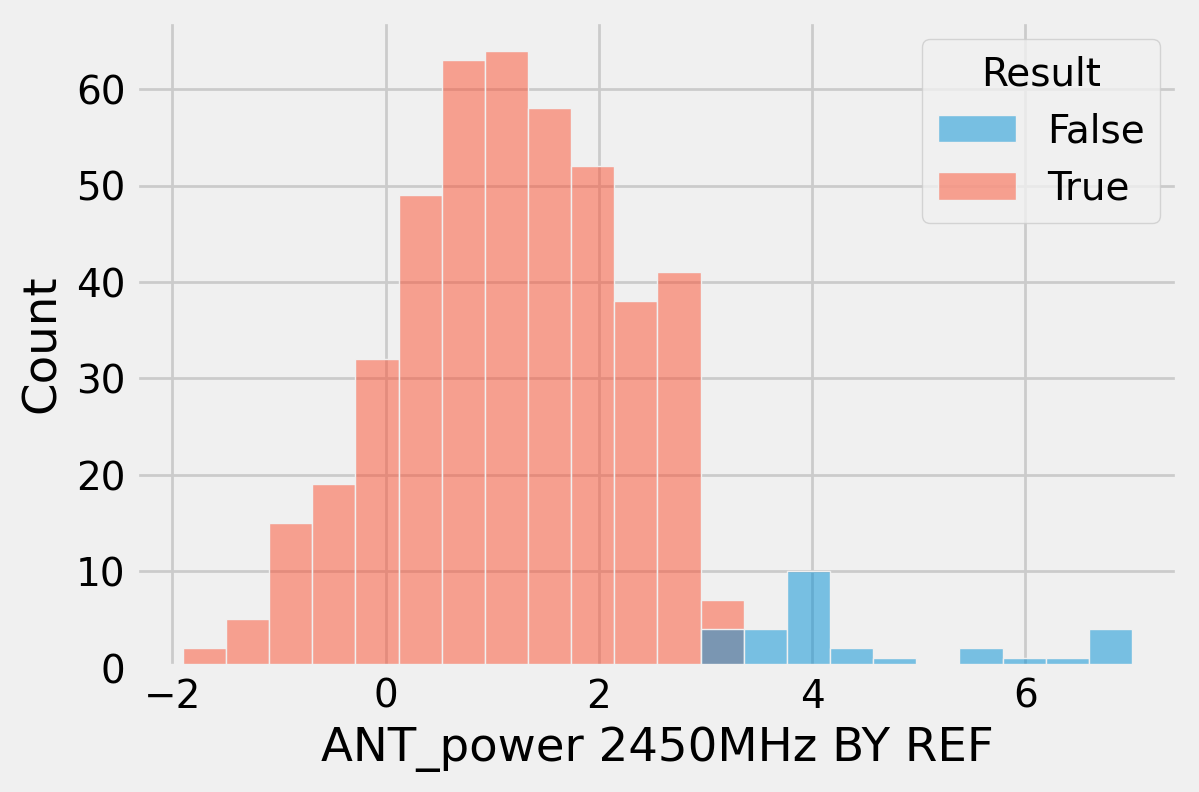

In [19]:
ANT = raw[(raw.ItemNameType == 17803) & (raw.failitem.isin([0,38]))]
plt.figure(dpi=200)
sns.histplot(data=ANT, x='ANT_power 2450MHz BY REF', hue='Result')

#重測率高是ESN014被硬測過去

6. HT-GPS_L5 by ref (16/448)

In [15]:
L5 = raw[(raw.ItemNameType == 17801) & (raw.failitem.isin([0,42]))].copy()
L5['GPS_L5 by ref'] = L5['GPS_L5 by ref'].clip(lower=-30) # Clip -999 to -30 to prevent -999 domain x axis

<AxesSubplot:xlabel='GPS_L5 by ref', ylabel='Count'>

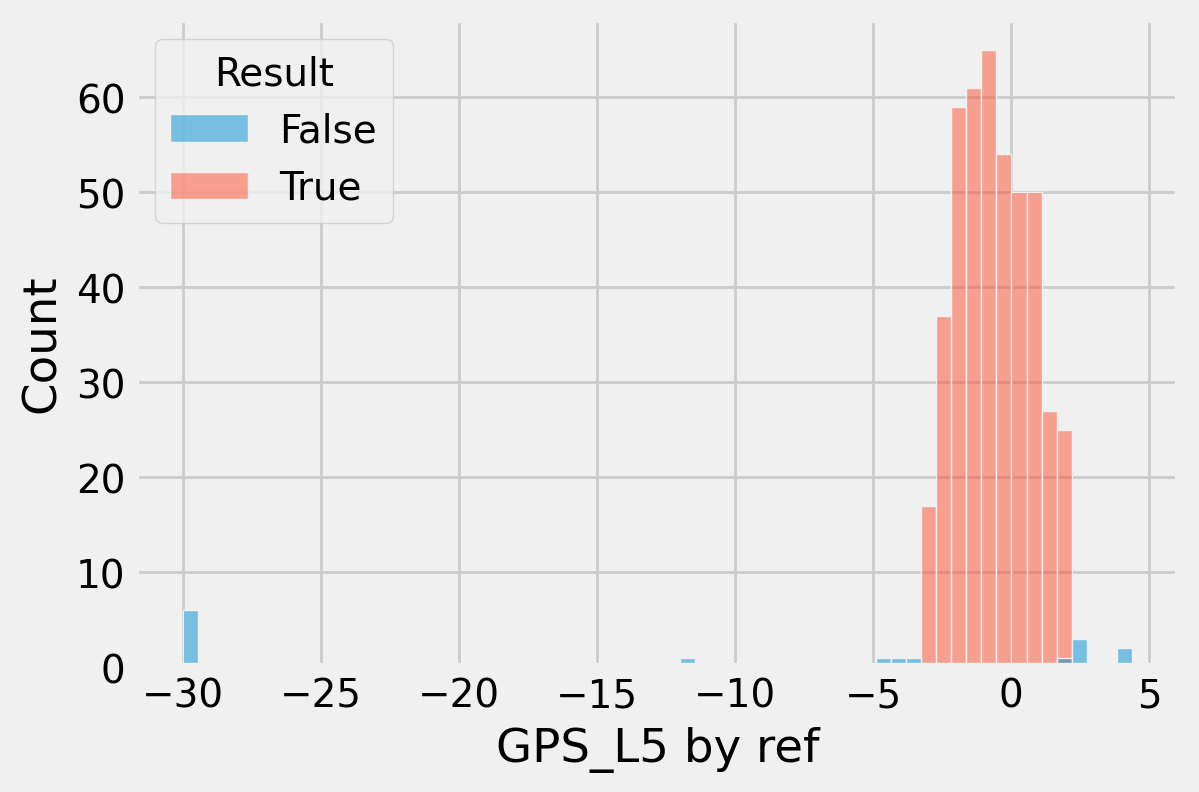

In [20]:
plt.figure(dpi=200)
sns.histplot(data=L5, x='GPS_L5 by ref', hue='Result')
# 遮光泡棉貼錯邊，擋到pogo pin

7. FT1- GPS_ (L1 + L5) by ref (15/443)

In [17]:
L1L5 = raw[(raw.ItemNameType == 17802) & (raw.failitem.isin([0,31]))]

<AxesSubplot:xlabel='GPS_ (L1 + L5) by ref', ylabel='Count'>

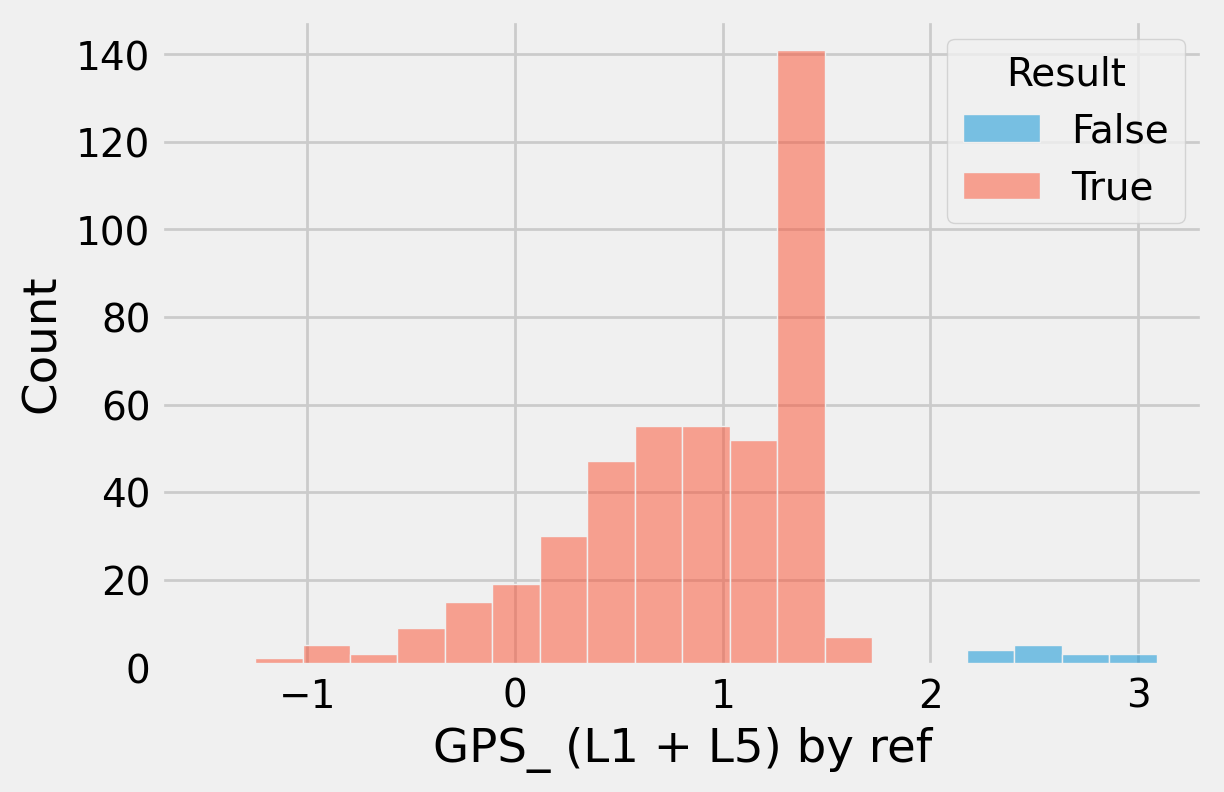

In [18]:
plt.figure(dpi=200)
sns.histplot(data=L1L5, x='GPS_ (L1 + L5) by ref', hue='Result')